## Lamp
lamp communication

In [2]:
import serial
import time

class apollo_device():
    def __init__(self, ComPort = 'COM18', ComBaudRate=115200):
        self.port = ComPort
        self.portBaudrate = ComBaudRate

        # Initialize serial connection
        self.ser = serial.Serial(self.port, self.portBaudrate, timeout=0.1)
        
        # Buffer to store received characters
        self.receive_buffer = ""
        
    def send(self, command):
        self.ser.write(command)
        
    def update(self, intensityRed, intensityGreen, intensityBlue, intensityWhite, fan, debugFlag=False):

        message = 'A '\
                  +str(intensityRed)+' '\
                  +str(intensityGreen)+' '\
                  +str(intensityBlue)+' '\
                  +str(intensityWhite)+' '\
                  +str(fan)+'\n'
        
        self.send(message.encode('utf-8'))
        if debugFlag:
            print(message.encode('utf-8'))

        self.read(debug=debugFlag)
        
    def read(self, debug=False):
        #self.ser.reset_input_buffer()
        #time.sleep(0.1)
        retryCount = 50;
        noPackageCount = 0;
        while noPackageCount<retryCount:
            # Read available characters
            data = self.ser.read()

            if data:
                self.receive_buffer = self.receive_buffer + data.decode('utf-8', errors='replace')
                    
                if data == b'\n':
                    if debug:
                        print(self.receive_buffer)
                        
                    timeInMs = time.time_ns() // 1_000_000
                    timeAsStr = str(timeInMs)
                    self.lastValAsJsonString = "{"+self.receive_buffer[self.receive_buffer.find('"'):-2]+',"Timestamp":'+timeAsStr+"}"
                    self.receive_buffer = ""
                    noPackageCount = 50;
            else:
                time.sleep(0.01)
                noPackageCount = noPackageCount+1
        
lamp1 = apollo_device()

# try 1
lamp1.update(1024,0,0,0,1,debugFlag=True)


b'A 1024 0 0 0 1\n'
A 1024 0 0 0 1"red_val":0,"green_val":0,"blue_val":0,"white_val":0,"fan_val":0,"temp":53.250000*



In [5]:
lamp1.update(10,1900,512,2000,int(2048*0.8),debugFlag=True)

b'A 10 1900 512 2000 1638\n'
A 10 1900 512 2000 1638"red_val":0,"green_val":1900,"blue_val":512,"white_val":2000,"fan_val":1638,"temp":54.250000*



In [4]:

lamp1.lastValAsJsonString

'{"red_val":2048,"green_val":0,"blue_val":0,"white_val":0,"fan_val":1638,"temp":34.125000,"Timestamp":1696859808604}'

## Test to run
Exit conditions
- [x] lamp will exceed 85C
- [ ] the temperature has stablized or is declining for 60 seconds

In [ ]:
# to STOP manually interupt the kernel (Kernel->Interrupt Kernel)
# the df object will precist up untill the stop moment

import json
import time
import pandas as pd

jsonFullString = "["

while True:
    lamp1.update(900,1900,260,2000,int(2048*0.8)) # ca 175.5W
    jsonObj = json.loads(lamp1.lastValAsJsonString)
    jsonFullString = jsonFullString + lamp1.lastValAsJsonString + ", "
    currentTemp = jsonObj["temp"]
    currentTime = jsonObj["Timestamp"]
    print(str(currentTime)+':'+str(currentTemp))
    if(currentTemp>85):
        lamp1.update(0,0,0,0,1024)
        break
    time.sleep(10)

jsonFullString = jsonFullString[:-2] + "]"
df = pd.read_json(jsonFullString)

In [1]:
lamp1.update(512,0,0,0,0, debugFlag=True)

NameError: name 'lamp1' is not defined

# lamp1.update(0,1900,200,2000,2048)

In [13]:
# Look at the data in table format
df

,red_val,green_val,blue_val,white_val,fan_val,temp,Timestamp
0,900,1900,260,2000,2048,38.250,2023-10-06 22:03:48.518
1,900,1900,260,2000,2048,39.875,2023-10-06 22:03:59.780
2,900,1900,260,2000,2048,41.625,2023-10-06 22:04:11.027
3,900,1900,260,2000,2048,43.375,2023-10-06 22:04:22.276
4,900,1900,260,2000,2048,44.750,2023-10-06 22:04:33.522
...,...,...,...,...,...,...,...
43,900,1900,260,2000,2048,69.250,2023-10-06 22:11:52.303
44,900,1900,260,2000,2048,69.500,2023-10-06 22:12:03.551
45,900,1900,260,2000,2048,69.750,2023-10-06 22:12:14.798
46,900,1900,260,2000,2048,69.875,2023-10-06 22:12:26.060


<AxesSubplot: xlabel='Timestamp'>

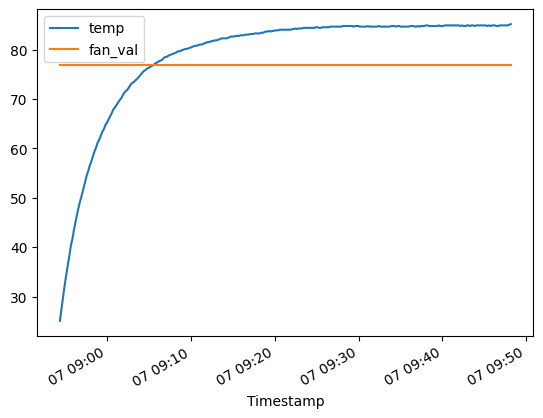

In [30]:
# Draw a graph

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

ddf = df.drop(["red_val","green_val","blue_val","white_val"], axis=1)
# Scale down the "fan_val" column by dividing it by 20
ddf['fan_val'] = ddf['fan_val'] / 20
#df = df.assign(lux = pd.to_numeric(df['lux'].str.replace('[^0-9.]', '')))

ddf.plot(y=["temp","fan_val"],x="Timestamp")

## Store the result
1. Run the beam tool (both cells below)
2. Create a new notebook and pase the content to 1st cell
3. Copy the cell to draw a graph and and paste it to 2nd cell in the new notebook
4. Save new notebook

Now the new notebook contains the original data + graph, you can add drawings and descriptiuons of the test in the notbook and it will be usable standalone

In [31]:
import pyperclip

# beam function to flatten object to b64 string that can unflatten itself in python
def beam(
    obj, 
    name='obj', 
    git='https://github.com/KKallas/Jupyter-Periscope', 
    file='Jupyter-Serializer.ipynb',
    desc='Python native imports'):
    """
    beam
    
    stringfy any python object to base64 string so it can be emailed, imd or functionally created
    
    obj: obje to strringify
    name: (optional, default 'obj') name of the restored variable
    """
    ### IMPORTS
    # Python native imports
    import codecs
    # A little failsafe to pip install dill if system does not have it yet
    try:
        import dill
    except e as Exception:
        !pip install dill
        import dill
        
    ### LOGIC
    # I merged few line here sorry, just dilling the object and encoding to base64 without any new line so it would not take multiple lines when pasted into new workbook
    nonewlines = codecs.encode(dill.dumps(obj),"base64").decode().replace('\n','')
    template = "#  git: " + git + "\n# file: " + file + "\n# desc: " + desc + "\n# A little failsafe to pip install dill if system does not have it yet\nimport codecs\ntry:\n    import dill\nexcept e as Exception:\n    !pip install dill\n    import dill\npayload = \'\'\'"+nonewlines+"\'\'\'\n"+name+" = dill.loads(codecs.decode(payload.encode(), 'base64'))"
    
    return template

# register new functionality to the [w] menu system
def call_beam(obj, name='obj'):
    pyperclip.copy(beam(obj, name=name))
    print("step copied...")

In [35]:
call_beam(df, name='df')

step copied...
